<h1>GEENRACION DE DATOS <h1>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
#AGREGO DECICSON TREE 
from sklearn.tree import DecisionTreeClassifier

Este Dataset es el utuilizado en los PAPERS de referencia

In [131]:
#DESCARGAMOS EL DATASET

#data_link = 'https://raw.githubusercontent.com/niwdehu/ProyectoFinal_INF648/main/DataSets/Dataset_with_SMOTENC.csv'
data_link = 'https://raw.githubusercontent.com/rebaza98/proyectoML2022/main/ObesityDataSet_raw_and_data_sinthetic.csv'

dataset_completo = pd.read_csv(data_link)
print('El dataset tiene la forma {}.'.format(dataset_completo.shape))
dataset_completo.head()

El dataset tiene la forma (2111, 17).


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Dicha Data fue obtenida atravez de una encuesta web y generada atra vez de ka herramienta SMOTE, los primeros 498 registros del dataset pertenecen a la data obtenida en la encuesta mientras que el resto con la herramienta

In [132]:
#SEPARAREMOS LA DATA PARA ANALIZAR SU CONTENIDO
dataset_encuesta = dataset_completo.head(498)
dataset_sintetico = dataset_completo.tail(1613)

Mostraremos la distribucion de las caracteristicas del dataset de la encuensta con los datos de la encuesta generada sintetica

In [133]:
#Determinamos que variables son del tipo númerico y cuales son categóricas BASADO EN EL EJERCICION LIMPIEZA DE DATA SET DEL CURSO
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in dataset_completo:
  #Determinamos si la variable es numérica o no
  if pd.api.types.is_numeric_dtype(dataset_completo[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la variable mediante "astype"
    dataset_completo[column] = dataset_completo[column].astype("category")

    #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset_completo[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset_completo[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

print(dictionary_of_columns_with_index_to_categorical)
print(dictionary_of_columns_with_categorical_to_index)

{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}, 'NObeyesdad': {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': {'no': 0, 'yes': 1}, 'SCC': {'no': 0, 'yes': 1}, 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'MTRANS': {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}, 'NObeye

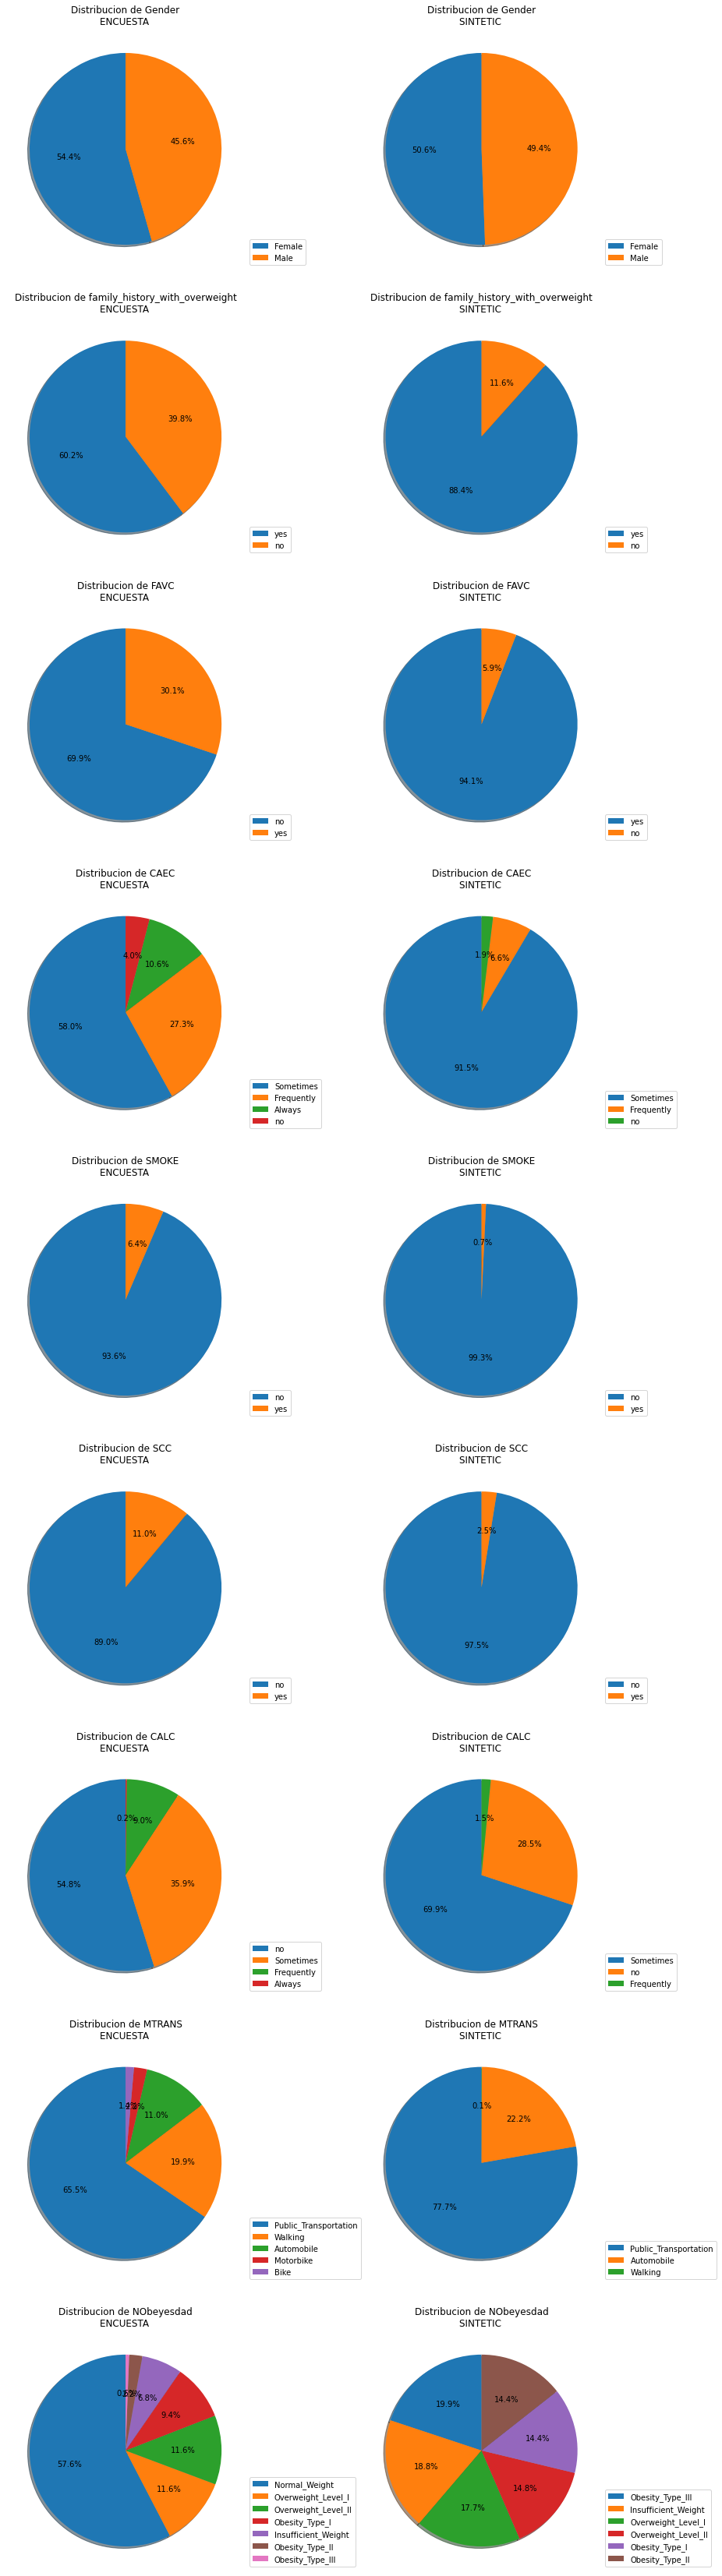

In [134]:
columnas = 9
filas = 2
fig, axs = plt.subplots(columnas, filas)
fig.set_figheight(60)
fig.set_figwidth(15)
indx = 0 
indy = 0

for key in dictionary_of_columns_with_categorical_to_index.keys():
  data = dataset_encuesta[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_encuesta[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key) +"\nENCUESTA ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0
  #DATASET COMPLETO
  data = dataset_sintetico[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_sintetico[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key)+ "\nSINTETIC ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0

EL objetivo de esta generacion era generar data de manera que la caracteristica NObeyesdad quede balanceada atravez del dataset para que los algoritmos puedan clasificar las diferentes clases con mayor eficiencia. Sinembargo como se puede apreciar en la data sintetica algunos valores desaparecen debido a la frecuencua nula que tienen el el dataset sintetico, esto se debe posiblemente a la poca cantidad de muestras en el dataset de la encusta.

Se recomienda que la data sintetica no pertenezca al grupo de validacion de un dataset como se ve en el articulo [Create Artificial Data With SMOTE
](https://towardsdatascience.com/create-artificial-data-with-smote-2a31ee855904)


Ademas como se puede apreciar , algunos valores tienen valor numerico pero fueron usadas de manera categorica, es decir , no permitia datos decimales entre los valores. Ejm: H2O consumido se escogia entre valores 1-2-3-4 sinembargo en el dataset sintetico se puede apreciar que muchos valores no son discretos y utilizan porcion decimal, algo que deforma la escencia de la data de la encuesta.
Otra observacion muy importante es que en la data sintetica no se encuentra la clase "Normal_Weight" debido a que ya cuenta con mayoria en la data de la encuesta y en funcion a esta cantidad se balancea todo el dataset

Para resolver esto utilizaremos la generacion de data Utilizando la libreria [SMOTE NC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html), que permite generar data con valores numericos y categoricos

Primero vemos la cantidad de registros que tiene la clase tarjet desbalanceada en su caracteristica mayoritaria que es "Normal_weight" como se puede ver en la distribucion superior

In [135]:
(dataset_encuesta['NObeyesdad'] == "Normal_Weight").value_counts()

True     287
False    211
Name: NObeyesdad, dtype: int64

In [136]:
#CON ESTE METODO SE CALCULARA EL TOTAL DE MUESTRAS CON LA SIGUIENTE FORMULA
#Retorna un dictionario con los Valores de la clase y la cantidad de muestra que debe tener para la columna tarjet "NOObeyesdad"
#Cantidad de registros de encuesta (498) * 100/porcentaje de encuesta / nro_clases
#Donde: 
#Cantidad de registros de encuesta = 498
#porcentaje de encuesta = Valor que queremos que la encuesta reporesente en el total del dataset ejem 20%
#nro_clases = 7  -> Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II'
def dict_Cantidad_Muestras(porcentaje_encuesta):
  nro_clases = 7
  dict_columna_valores = {}
  cantidad_total_por_clase = int((len(dataset_encuesta) * 100/porcentaje_encuesta)/nro_clases)
  for key in dictionary_of_columns_with_categorical_to_index["NObeyesdad"].keys():
    dict_columna_valores[key] = cantidad_total_por_clase
  return dict_columna_valores

In [137]:
#IMPORTAMOS LA LIBRERIA SMOTECNC 
from imblearn.over_sampling import SMOTENC
dic_muestras_por_clase = {}
dic_muestras_por_clase = dict_Cantidad_Muestras(20)
#muestras_normal_weight = {}
#muestras_normal_weight["Normal_Weight"] = 1722
#Los indices de las variables categoricas que se utilizaran en la generacion deben indicarse en "categorical_features"
y = dataset_encuesta["NObeyesdad"]
sm = SMOTENC(categorical_features=[0,4,5,6,7,8,9,10,11,12,13,14,15,16], k_neighbors=2, sampling_strategy = dic_muestras_por_clase)
dataset_sintetico_smotenc, Y_trainers = sm.fit_resample(dataset_encuesta,y)

dataset_sintetico_smotenc


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (355) in class Insufficient_Weight will be larger than the number of samples in the majority class (class #Normal_Weight -> 287)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (355) in class Normal_Weight will be larger than the number of samples in the majority class (class #Normal_Weight -> 287)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (355) in class Obesity_Type_I will be larger than the number of samples in the majority class (class #Normal_Weight -> 287)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,Male,22.123480,1.650000,80.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,no,Walking,Overweight_Level_II
2481,Male,33.301758,1.710947,83.301758,yes,yes,2.0,3.0,Frequently,no,2.0,no,3.0,0.0,Sometimes,Automobile,Overweight_Level_II
2482,Female,27.489696,1.654691,78.000000,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Frequently,Automobile,Overweight_Level_II
2483,Male,27.602157,1.921971,101.698921,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Walking,Overweight_Level_II


Como se puede oberservar las variables categoricas numericas mantienen un valor similar al de la dataset de la encuesta
Volvemos a graficar la distribucion de esta nueva data sintetica y se puede observar que la caracteristiica sigue estando balanceada 

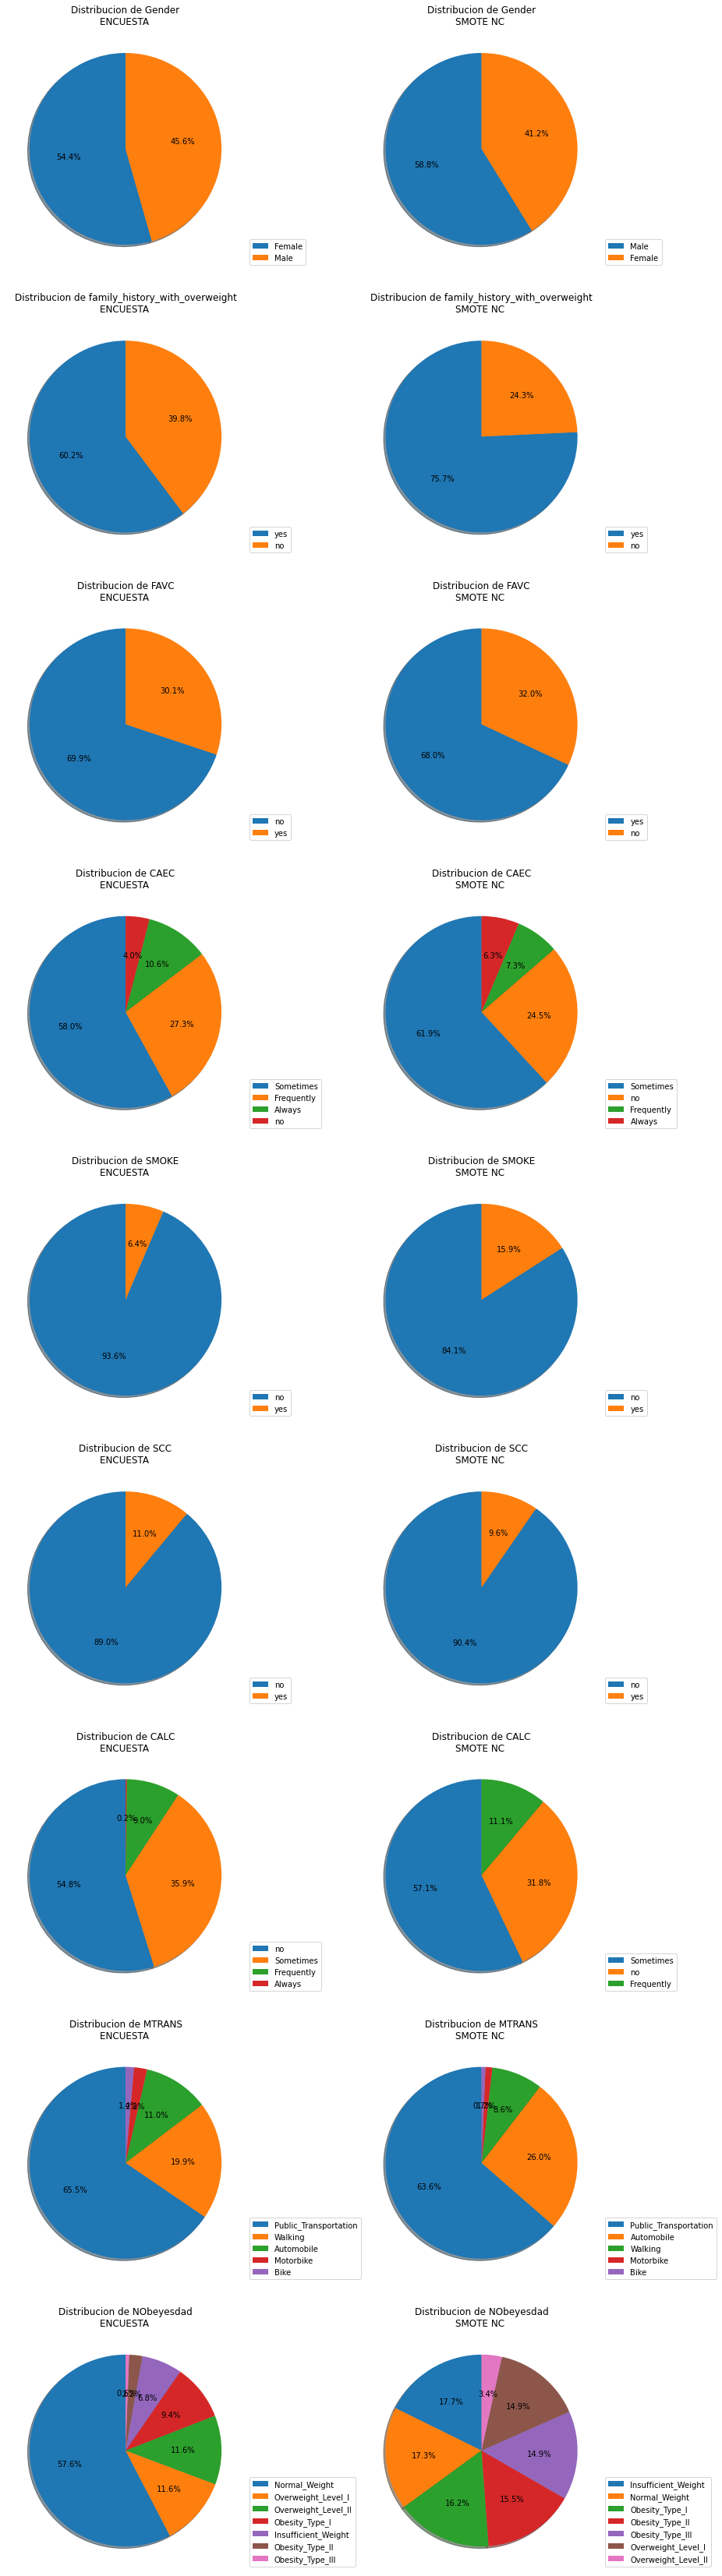

In [138]:
#SEPARAMOS NUEVAMENTE LA DATA SINTITUCA DE LA ENCUESTA
tail = len(dataset_sintetico_smotenc) - 498
dataset_encuesta = dataset_completo.head(498)
dataset_sintetico2 = dataset_sintetico_smotenc.tail(tail)
#GRAFICAMOS LA NUEVA RELACION 
columnas = 9
filas = 2
fig, axs = plt.subplots(columnas, filas)
fig.set_figheight(60)
fig.set_figwidth(15)
indx = 0 
indy = 0

for key in dictionary_of_columns_with_categorical_to_index.keys():
  data = dataset_encuesta[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_encuesta[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key) +"\nENCUESTA ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0
  #DATASET COMPLETO
  data = dataset_sintetico2[key].value_counts()
  axs[indx, indy].pie(data, autopct='%1.1f%%', shadow=True, startangle=90)
  labels = dataset_sintetico2[key].unique()
  axs[indx, indy].legend(labels,bbox_to_anchor=(1, 0),loc='lower left')
  axs[indx, indy].set_title('Distribucion de ' +  str(key)+ "\nSMOTE NC ", fontsize = 12)
  indy = indy + 1
  if indy > filas - 1:
    indx = indx + 1
    indy = 0

A continuacion se muestra la distribucion de los valores del trajet en todo el dataset 

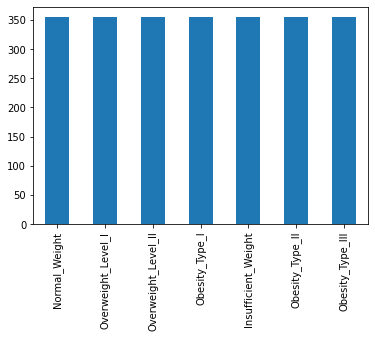

In [139]:
dataset_sintetico_smotenc['NObeyesdad'].value_counts().plot(kind='bar')


In [140]:
#Grabaremos esta dataset para darle pesistencia y poder ser analizada en este estudio SE COMENTA PARA EVITAR SOBRE-ESCRITURA
# from google.colab import  drive
# drive.mount('/content/drive', force_remount=True)
# dataset_sintetico_smotenc.to_csv('drive/My Drive/maestria2022-1/machineLearning/Dataset_with_SMOTENC.csv', index=False)

Mounted at /content/drive


In [141]:
dataset_sintetico_smotenc.shape

(2485, 17)

In [142]:
#Metodo que retorna el dataset convertido basado en preprocesDataset caso TITANIC del CURSO
def fillColumnaCategorica(dataset):
  datacopy = dataset.copy()

  #REMOVER COLUMNA DURACION HEIGHT and WEIGHT
  
  datacopy = datacopy.drop("Height", axis=1)
  datacopy = datacopy.drop("Weight", axis=1)
  
  
    #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in datacopy:
    #Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(datacopy[column]):
      numeric_columns.append(column)
    else:
      #Modificamos el tipo de dato de la variable mediante "astype"
      datacopy[column] = datacopy[column].astype("category")

      #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
      if not pd.api.types.is_categorical_dtype(datacopy[column]):
        raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

      dictionary_of_columns_with_index_to_categorical[column] = dict()
      dictionary_of_columns_with_categorical_to_index[column] = dict()
      
      #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
      for index, category in enumerate(datacopy[column].cat.categories):
        dictionary_of_columns_with_index_to_categorical[column][index] = category
        dictionary_of_columns_with_categorical_to_index[column][category] = index
      
      categorical_columns.append(column)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  datacopy.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  print("COLUMNAS NUMERICAS", numeric_columns)
  print("COLUMNAS CATEGORICAS",categorical_columns)
  print("DICCIONARIOS DE VALORES ")
  print(dictionary_of_columns_with_index_to_categorical)
  print(dictionary_of_columns_with_categorical_to_index)
  

 
  return datacopy